In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
import numpy as np

# Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()

# Reverse index to word mapping
reverse_word_index = {value: key for key, value in word_index.items()}

# Convert back to text
x_train_text = [" ".join([reverse_word_index.get(i - 3, "?") for i in seq]) for seq in x_train[:1000]]

# Tokenize and pad
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train_text)
sequences = tokenizer.texts_to_sequences(x_train_text)
padded = pad_sequences(sequences, maxlen=300)

# Load pre-trained Word2Vec
import gensim.downloader as api
w2v = api.load("word2vec-google-news-300")
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1

# Create embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in w2v:
        embedding_matrix[i] = w2v[word]

# Define LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=300, trainable=False))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

[==================================================] 100.0% 1662.8/1662.8MB downloaded


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       2,701,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,701,800 (10.31 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,701,800 (10.31 MB)

In [6]:
model.fit(padded, y_train[:1000], epochs=5, validation_split=0.2)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 566ms/step - accuracy: 0.5414 - loss: 0.6831 - val_accuracy: 0.5000 - val_loss: 0.7693
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 547ms/step - accuracy: 0.6383 - loss: 0.6324 - val_accuracy: 0.6350 - val_loss: 0.6379
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 547ms/step - accuracy: 0.7304 - loss: 0.5847 - val_accuracy: 0.6400 - val_loss: 0.6312
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 552ms/step - accuracy: 0.7549 - loss: 0.5688 - val_accuracy: 0.5800 - val_loss: 0.7737
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 546ms/step - accuracy: 0.7953 - loss: 0.4651 - val_accuracy: 0.7600 - val_loss: 0.5341


In [8]:
# Convert x_test back to text
x_test_text = [" ".join([reverse_word_index.get(i - 3, "?") for i in seq]) for seq in x_test[:1000]]

# Tokenize and pad
test_sequences = tokenizer.texts_to_sequences(x_test_text)
padded_test = pad_sequences(test_sequences, maxlen=300)

# Evaluate
loss, accuracy = model.evaluate(padded_test, y_test[:1000])
print(f"Test Accuracy: {accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 0.7491 - loss: 0.4889
Test Accuracy: 0.7510


In [9]:
predictions = model.predict(padded_test)
print(predictions[:5])  # Print first 5 predicted probabilities
print((predictions[:5] > 0.5).astype("int"))  # Convert to 0 or 1

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step
[[0.5261361 ]
 [0.49795592]
 [0.5739323 ]
 [0.51145065]
 [0.4241729 ]]
[[1]
 [0]
 [1]
 [1]
 [0]]


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 551ms/step - accuracy: 0.8041 - loss: 0.4153 - val_accuracy: 0.7050 - val_loss: 0.5825
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 553ms/step - accuracy: 0.8227 - loss: 0.4554 - val_accuracy: 0.8100 - val_loss: 0.5254
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 575ms/step - accuracy: 0.8085 - loss: 0.4054 - val_accuracy: 0.7150 - val_loss: 0.5741
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 548ms/step - accuracy: 0.8329 - loss: 0.3752 - val_accuracy: 0.7750 - val_loss: 0.5165
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 552ms/step - accuracy: 0.8723 - loss: 0.3586 - val_accuracy: 0.7750 - val_loss: 0.5681


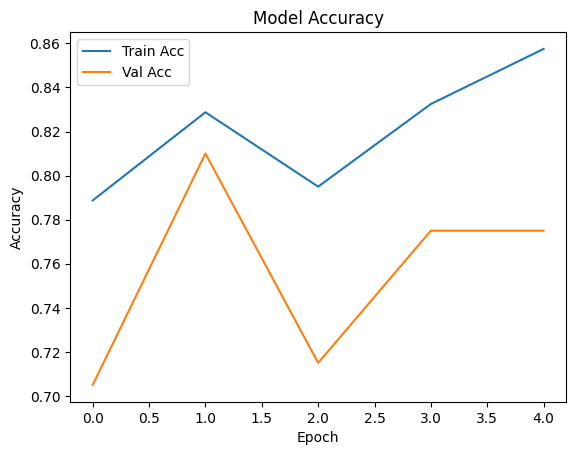

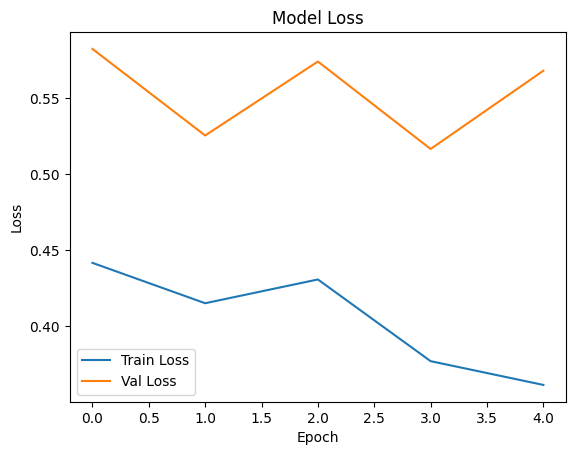

In [11]:
import matplotlib.pyplot as plt

history = model.fit(padded, y_train[:1000], epochs=5, validation_split=0.2)

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()